# Introduction
This file serves as an interactive and easy to use notebook for reproducing a majority of the results from our groups project for the CSE 481 Neural Engineering Capstone. Our project aimed to process raw single-channeled EEG data from numerous sleep study participants and develop/train various models to determine what methods are most effective at classifying these signals into their correct sleep stages. Our project aimed to develop classifiers that could be used to assist other researchers in the field as the first step in most sleep-study experiments relies on an expert spending multiple hours hand labeling the EEG signals themselves.

In [3]:
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import tensorflow as tf

Note: Please uncomment this cell if you are running the notebook on google colab and wish to import data through your personal drive.

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


# Preprocessing
Our data is organized into various .npz files each of which correspond to the data from a single participant in the sleep study we utilized. The singal is processed using a sampling rate of 100 Hz and then divided into separate 30 second epochs. We extract a test set that is equivalent to ~10% of the total data and reserve the rest for training our models. We process each file according to whichever set it belongs, vectorize the data, and one-hot-encode the labels into a format that is understandable to our models.

As a result our input data is a collection of 3000x1 vectors corresponding to a sampled epoch and our labels are a collection of 5x1 vectors corresponding to which label below (using labels_dict) the input matches to. 

In [ ]:
labels_dict = {
    0: "W",
    1: "N1",
    2: "N2",
    3: "N3",
    4: "REM"
}

In [ ]:
# Read in all files from directory
data_dir = "drive/MyDrive/data/eeg_fpz_cz"
allfiles = os.listdir(data_dir)
print(allfiles)

['SC4001E0.npz', 'SC4002E0.npz', 'SC4011E0.npz', 'SC4012E0.npz', 'SC4021E0.npz', 'SC4022E0.npz', 'SC4031E0.npz', 'SC4032E0.npz', 'SC4041E0.npz', 'SC4042E0.npz', 'SC4051E0.npz', 'SC4052E0.npz', 'SC4061E0.npz', 'SC4062E0.npz', 'SC4071E0.npz', 'SC4072E0.npz', 'SC4081E0.npz', 'SC4082E0.npz', 'SC4091E0.npz', 'SC4092E0.npz', 'SC4101E0.npz', 'SC4102E0.npz', 'SC4111E0.npz', 'SC4112E0.npz', 'SC4121E0.npz', 'SC4122E0.npz', 'SC4131E0.npz', 'SC4141E0.npz', 'SC4142E0.npz', 'SC4151E0.npz', 'SC4152E0.npz', 'SC4161E0.npz', 'SC4162E0.npz', 'SC4171E0.npz', 'SC4172E0.npz', 'SC4181E0.npz', 'SC4182E0.npz', 'SC4191E0.npz', 'SC4192E0.npz']


In [ ]:
# Process only .npz files
npzfiles = []
for idx, f in enumerate(allfiles):
    if ".npz" in f:
        npzfiles.append(os.path.join(data_dir, f))
npzfiles.sort()
print(npzfiles)

['drive/MyDrive/data/eeg_fpz_cz/SC4001E0.npz', 'drive/MyDrive/data/eeg_fpz_cz/SC4002E0.npz', 'drive/MyDrive/data/eeg_fpz_cz/SC4011E0.npz', 'drive/MyDrive/data/eeg_fpz_cz/SC4012E0.npz', 'drive/MyDrive/data/eeg_fpz_cz/SC4021E0.npz', 'drive/MyDrive/data/eeg_fpz_cz/SC4022E0.npz', 'drive/MyDrive/data/eeg_fpz_cz/SC4031E0.npz', 'drive/MyDrive/data/eeg_fpz_cz/SC4032E0.npz', 'drive/MyDrive/data/eeg_fpz_cz/SC4041E0.npz', 'drive/MyDrive/data/eeg_fpz_cz/SC4042E0.npz', 'drive/MyDrive/data/eeg_fpz_cz/SC4051E0.npz', 'drive/MyDrive/data/eeg_fpz_cz/SC4052E0.npz', 'drive/MyDrive/data/eeg_fpz_cz/SC4061E0.npz', 'drive/MyDrive/data/eeg_fpz_cz/SC4062E0.npz', 'drive/MyDrive/data/eeg_fpz_cz/SC4071E0.npz', 'drive/MyDrive/data/eeg_fpz_cz/SC4072E0.npz', 'drive/MyDrive/data/eeg_fpz_cz/SC4081E0.npz', 'drive/MyDrive/data/eeg_fpz_cz/SC4082E0.npz', 'drive/MyDrive/data/eeg_fpz_cz/SC4091E0.npz', 'drive/MyDrive/data/eeg_fpz_cz/SC4092E0.npz', 'drive/MyDrive/data/eeg_fpz_cz/SC4101E0.npz', 'drive/MyDrive/data/eeg_fpz_cz/SC

In [ ]:
# Randomly split in 90% train, 10% test
idx = np.random.permutation(len(npzfiles))
train_idx = idx[: 9*len(npzfiles) // 10]
test_idx = idx[9*len(npzfiles) // 10 :]

In [ ]:
# Extract train and test files
train_files = [npzfiles[i] for i in train_idx]
test_files = [npzfiles[i] for i in test_idx]

In [ ]:
# Function used to read a collection of .npz files and return processed data and labels
def extract_files(files):
    data = []
    labels = []
    fs = None
    for file in files:
        print("Loading {} ...".format(file))
        with np.load(file) as f:
            d = f['x']
            l = f['y']
            sr = f['fs']
        fs = sr
        data.append(d)
        labels.append(l)
    data = np.vstack(data)
    labels = np.hstack(labels)
    labels = tf.one_hot(labels, 5)
    return data, labels

In [ ]:
# Final train and test sets
train_X, train_y = extract_files(train_files)
test_X, test_y = extract_files(test_files)

Loading drive/MyDrive/data/eeg_fpz_cz/SC4011E0.npz ...
Loading drive/MyDrive/data/eeg_fpz_cz/SC4041E0.npz ...
Loading drive/MyDrive/data/eeg_fpz_cz/SC4192E0.npz ...
Loading drive/MyDrive/data/eeg_fpz_cz/SC4151E0.npz ...
Loading drive/MyDrive/data/eeg_fpz_cz/SC4081E0.npz ...
Loading drive/MyDrive/data/eeg_fpz_cz/SC4091E0.npz ...
Loading drive/MyDrive/data/eeg_fpz_cz/SC4062E0.npz ...
Loading drive/MyDrive/data/eeg_fpz_cz/SC4121E0.npz ...
Loading drive/MyDrive/data/eeg_fpz_cz/SC4021E0.npz ...
Loading drive/MyDrive/data/eeg_fpz_cz/SC4032E0.npz ...
Loading drive/MyDrive/data/eeg_fpz_cz/SC4131E0.npz ...
Loading drive/MyDrive/data/eeg_fpz_cz/SC4181E0.npz ...
Loading drive/MyDrive/data/eeg_fpz_cz/SC4182E0.npz ...
Loading drive/MyDrive/data/eeg_fpz_cz/SC4172E0.npz ...
Loading drive/MyDrive/data/eeg_fpz_cz/SC4082E0.npz ...
Loading drive/MyDrive/data/eeg_fpz_cz/SC4161E0.npz ...
Loading drive/MyDrive/data/eeg_fpz_cz/SC4122E0.npz ...
Loading drive/MyDrive/data/eeg_fpz_cz/SC4111E0.npz ...
Loading dr

# Hyper Parameter Tuning and Model Architecture
We created and trained three separate models with different architectures to try and uncover which would be most effective for the task at hand. The three models are as follows:


1.   Basic CNN

> From our initial research, we uncovered that the most widely used networks for working with time series data and specifically EEG signals relies on a convolutional neural net as the backbone for feature extraction. As a result, our group decided it was a natural first step to try and develop and train a CNN of our own to see how effective this type of model would be at extracting features and making classifications.


2.   CNN-LSTM

> To expand upon the CNN architecture from (1) many other researchers have suggested feeding the features extracted from a CNN into a recurrent neural net in hopes of being able to better learn transition rules between the various stages. As a result, the second implementation that we tested was a model which fed the results from our CNN into some long short-term memory (LSTM) cells.

3.   CNN-Transformer

> As an attempt to expand upon current literature and contribute our own findings to the space our group decided to test a third architecture. We were inspired by the recent results coming from related ML fields such as NLP where attention based models have begun to outperform RNN based models including LSTM layers. As a result, our group wanted to investigate the results of replacing the LSTM layers in (2) with a transformer based layer to see if this new model could better learn the transition rules.

We begun by defining the general architecture for each model and then performing a randomized cross validation hyperparameter grid search over a subset of hyperparameters we decided were most critical to the model. 

Note: Unfortunately even with access to a GPU the training time for model (3) proved to be prohibitively long for great hyper parameter tuning. The model trained for several hours with each subset and as a result allowed us only to manually check a few configurations by hand. 



In [1]:
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

Let's first run hyperparameter tuning for our basic CNN Model (1):

In [ ]:
# Build function for our basic CNN model (1)
def get_CNN_model(k1_size=50, pool1_size=8, conv_size=8, learnRate=0.01):
  model = keras.Sequential()
  model.add(tf.keras.layers.Conv1D(filters=128, kernel_size=k1_size, strides=k1_size//8, activation='relu', padding='same', input_shape=(3000,1)))
  model.add(tf.keras.layers.MaxPooling1D(pool_size=pool1_size, strides =pool1_size, padding="same"))
  model.add(tf.keras.layers.Dropout(rate=0.5))
  model.add(tf.keras.layers.Conv1D(filters=128, kernel_size=conv_size, strides=1, activation='relu'))
  model.add(tf.keras.layers.Conv1D(filters=128, kernel_size=conv_size, strides=1, activation='relu'))
  model.add(tf.keras.layers.Conv1D(filters=128, kernel_size=conv_size, strides=1, activation='relu'))
  model.add(tf.keras.layers.MaxPooling1D(pool_size=pool1_size//2, strides=pool1_size//2, padding="same"))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dropout(rate=0.5))
  model.add(tf.keras.layers.Dense(700))
  model.add(tf.keras.layers.Dense(5, activation='softmax'))

  sgd=keras.optimizers.SGD(learning_rate=learnRate)
  model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

  return model

In [ ]:
# Define classifier and hyper parameter grid
model = KerasClassifier(build_fn=get_CNN_model, verbose=2)

k1_size = [25, 50, 75]
pool1_size = [4, 8, 16]
conv_size = [4, 8, 16]
learnRate = [1e-2, 1e-3, 1e-4]
batchSize=[64]
epochs=[20]

grid = {
    "k1_size": k1_size,
    "pool1_size": pool1_size,
    "conv_size": conv_size,
    "learnRate": learnRate,
    "batch_size": batchSize,
    "epochs": epochs
}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


In [ ]:
# run randomized CV search
searcher = RandomizedSearchCV(estimator=model, cv=5, param_distributions=grid, scoring='accuracy')
searchResults = searcher.fit(train_X, np.argmax(train_y.numpy(), axis=1))

bestScore = searchResults.best_score_
bestParams = searchResults.best_params_
print("Best score is {:.2f} using {}".format(bestScore,	bestParams))

Epoch 1/20
472/472 - 9s - loss: 2.8670 - accuracy: 0.2846 - 9s/epoch - 18ms/step
Epoch 2/20
472/472 - 5s - loss: 1.7936 - accuracy: 0.3276 - 5s/epoch - 11ms/step
Epoch 3/20
472/472 - 6s - loss: 1.5395 - accuracy: 0.3829 - 6s/epoch - 12ms/step
Epoch 4/20
472/472 - 5s - loss: 1.3822 - accuracy: 0.4505 - 5s/epoch - 12ms/step
Epoch 5/20
472/472 - 5s - loss: 1.2548 - accuracy: 0.5117 - 5s/epoch - 11ms/step
Epoch 6/20
472/472 - 5s - loss: 1.1608 - accuracy: 0.5577 - 5s/epoch - 11ms/step
Epoch 7/20
472/472 - 5s - loss: 1.0910 - accuracy: 0.5838 - 5s/epoch - 11ms/step
Epoch 8/20
472/472 - 5s - loss: 1.0369 - accuracy: 0.6061 - 5s/epoch - 11ms/step
Epoch 9/20
472/472 - 5s - loss: 0.9952 - accuracy: 0.6147 - 5s/epoch - 11ms/step
Epoch 10/20
472/472 - 5s - loss: 0.9569 - accuracy: 0.6284 - 5s/epoch - 11ms/step
Epoch 11/20
472/472 - 5s - loss: 0.9211 - accuracy: 0.6435 - 5s/epoch - 11ms/step
Epoch 12/20
472/472 - 5s - loss: 0.8961 - accuracy: 0.6479 - 5s/epoch - 11ms/step
Epoch 13/20
472/472 - 5s 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_

Epoch 1/20
590/590 - 8s - loss: 1.1236 - accuracy: 0.5718 - 8s/epoch - 13ms/step
Epoch 2/20
590/590 - 7s - loss: 0.7592 - accuracy: 0.7183 - 7s/epoch - 12ms/step
Epoch 3/20
590/590 - 7s - loss: 0.6619 - accuracy: 0.7577 - 7s/epoch - 12ms/step
Epoch 4/20
590/590 - 7s - loss: 0.6105 - accuracy: 0.7740 - 7s/epoch - 12ms/step
Epoch 5/20
590/590 - 7s - loss: 0.5834 - accuracy: 0.7856 - 7s/epoch - 12ms/step
Epoch 6/20
590/590 - 7s - loss: 0.5613 - accuracy: 0.7912 - 7s/epoch - 12ms/step
Epoch 7/20
590/590 - 7s - loss: 0.5482 - accuracy: 0.7977 - 7s/epoch - 12ms/step
Epoch 8/20
590/590 - 7s - loss: 0.5345 - accuracy: 0.8026 - 7s/epoch - 12ms/step
Epoch 9/20
590/590 - 7s - loss: 0.5319 - accuracy: 0.8012 - 7s/epoch - 12ms/step
Epoch 10/20
590/590 - 7s - loss: 0.5178 - accuracy: 0.8091 - 7s/epoch - 12ms/step
Epoch 11/20
590/590 - 7s - loss: 0.5082 - accuracy: 0.8119 - 7s/epoch - 12ms/step
Epoch 12/20
590/590 - 7s - loss: 0.5005 - accuracy: 0.8154 - 7s/epoch - 12ms/step
Epoch 13/20
590/590 - 7s 

In [4]:
# BEST CNN MODEL BASED ON HYPERPARAMETER TUNING
best_CNN = keras.Sequential([
        tf.keras.layers.Conv1D(filters=128, kernel_size=25, strides=3, activation='relu', padding='same', input_shape=(3000,1)),
        tf.keras.layers.MaxPooling1D(pool_size=16, strides =16, padding="same"),
        tf.keras.layers.Dropout(rate=0.5),
        tf.keras.layers.Conv1D(filters=128, kernel_size=16, strides=1, activation='relu'),
        tf.keras.layers.Conv1D(filters=128, kernel_size=16, strides=1, activation='relu'),
        tf.keras.layers.Conv1D(filters=128, kernel_size=16, strides=1, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=8, strides=8, padding="same"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(rate=0.5),
        tf.keras.layers.Dense(700),
        tf.keras.layers.Dense(5, activation='softmax')
    ])
best_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1000, 128)         3328      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 63, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 48, 128)           262272    
                                                                 
 conv1d_2 (Conv1D)           (None, 33, 128)           262272    
                                                                 
 conv1d_3 (Conv1D)           (None, 18, 128)           262272    
                                                        

In [ ]:
# Evaluate best CNN
sgd=keras.optimizers.SGD(learning_rate=0.01)
best_CNN.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
best_CNN.fit(train_X, train_y, batch_size=64, epochs=20, verbose = 2)
best_CNN.evaluate(test_X, test_y)

Epoch 1/20
590/590 - 8s - loss: 1.1505 - accuracy: 0.5624 - 8s/epoch - 14ms/step
Epoch 2/20
590/590 - 7s - loss: 0.7722 - accuracy: 0.7169 - 7s/epoch - 12ms/step
Epoch 3/20
590/590 - 7s - loss: 0.6710 - accuracy: 0.7536 - 7s/epoch - 12ms/step
Epoch 4/20
590/590 - 7s - loss: 0.6207 - accuracy: 0.7748 - 7s/epoch - 12ms/step
Epoch 5/20
590/590 - 7s - loss: 0.5902 - accuracy: 0.7836 - 7s/epoch - 12ms/step
Epoch 6/20
590/590 - 7s - loss: 0.5678 - accuracy: 0.7926 - 7s/epoch - 12ms/step
Epoch 7/20
590/590 - 7s - loss: 0.5511 - accuracy: 0.7962 - 7s/epoch - 12ms/step
Epoch 8/20
590/590 - 7s - loss: 0.5330 - accuracy: 0.8041 - 7s/epoch - 12ms/step
Epoch 9/20
590/590 - 7s - loss: 0.5235 - accuracy: 0.8062 - 7s/epoch - 12ms/step
Epoch 10/20
590/590 - 7s - loss: 0.5185 - accuracy: 0.8065 - 7s/epoch - 12ms/step
Epoch 11/20
590/590 - 7s - loss: 0.5063 - accuracy: 0.8112 - 7s/epoch - 12ms/step
Epoch 12/20
590/590 - 7s - loss: 0.4990 - accuracy: 0.8151 - 7s/epoch - 12ms/step
Epoch 13/20
590/590 - 7s 

[0.46764853596687317, 0.8234395384788513]

Let's now run hyperparameter tuning for our CNN-LSTM model (2)

In [ ]:
model2 = keras.Sequential([
        tf.keras.layers.Conv1D(filters=128, kernel_size=50, strides=6, activation='relu', padding='same', input_shape=(3000,1)),
        tf.keras.layers.MaxPooling1D(pool_size=8, strides =8, padding="same"),
        tf.keras.layers.Dropout(rate=0.5),
        tf.keras.layers.Conv1D(filters=128, kernel_size=8, strides=1, activation='relu'),
        tf.keras.layers.Conv1D(filters=128, kernel_size=8, strides=1, activation='relu'),
        tf.keras.layers.Conv1D(filters=128, kernel_size=8, strides=1, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=4, strides=4, padding="same"),
        tf.keras.layers.Dropout(rate=0.5),
        tf.keras.layers.RNN(keras.layers.LSTMCell(128)),
        tf.keras.layers.Dropout(rate=0.5),
        tf.keras.layers.Dense(5, activation='softmax')
  ])

In [ ]:
# Build function for CNN-LSTM
def build_CNN_LSTM(num_cells=128, dropout=0.5, learnRate=0.1):
  model = keras.Sequential()
  model.add(tf.keras.layers.Conv1D(filters=128, kernel_size=25, strides=3, activation='relu', padding='same', input_shape=(3000,1)))
  model.add(tf.keras.layers.MaxPooling1D(pool_size=16, strides =16, padding="same"))
  model.add(tf.keras.layers.Dropout(rate=dropout))
  model.add(tf.keras.layers.Conv1D(filters=128, kernel_size=16, strides=1, activation='relu'))
  model.add(tf.keras.layers.Conv1D(filters=128, kernel_size=16, strides=1, activation='relu'))
  model.add(tf.keras.layers.Conv1D(filters=128, kernel_size=16, strides=1, activation='relu'))
  model.add(tf.keras.layers.MaxPooling1D(pool_size=8, strides=8, padding="same"))
  model.add(tf.keras.layers.Dropout(rate=dropout))
  model.add(tf.keras.layers.RNN(keras.layers.LSTMCell(num_cells)))
  model.add(tf.keras.layers.Dropout(rate=dropout))
  model.add(tf.keras.layers.Dense(5, activation='softmax'))

  sgd=keras.optimizers.SGD(learning_rate=learnRate)
  model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

  return model

In [ ]:
# Define classifier and grid to search over
model = KerasClassifier(build_fn=build_CNN_LSTM, verbose=2)

num_cells = [64, 128, 256]
dropout = [0.3, 0.4, 0.5]
learnRate = [1e-2, 1e-3, 1e-4]
batchSize=[64]
epochs=[20]

grid = {
    "num_cells": num_cells,
    "dropout": dropout,
    "learnRate": learnRate,
    "batch_size": batchSize,
    "epochs": epochs
}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
# Run randomized CV search
searcher = RandomizedSearchCV(estimator=model, cv=5, param_distributions=grid, scoring='accuracy')
searchResults = searcher.fit(train_X, np.argmax(train_y.numpy(), axis=1))

bestScore = searchResults.best_score_
bestParams = searchResults.best_params_
print("Best score is {:.2f} using {}".format(bestScore,	bestParams))

Epoch 1/20
472/472 - 9s - loss: 1.0516 - accuracy: 0.5909 - 9s/epoch - 19ms/step
Epoch 2/20
472/472 - 7s - loss: 0.7388 - accuracy: 0.7289 - 7s/epoch - 15ms/step
Epoch 3/20
472/472 - 7s - loss: 0.6611 - accuracy: 0.7588 - 7s/epoch - 15ms/step
Epoch 4/20
472/472 - 7s - loss: 0.6113 - accuracy: 0.7765 - 7s/epoch - 15ms/step
Epoch 5/20
472/472 - 7s - loss: 0.5767 - accuracy: 0.7872 - 7s/epoch - 15ms/step
Epoch 6/20
472/472 - 7s - loss: 0.5594 - accuracy: 0.7944 - 7s/epoch - 15ms/step
Epoch 7/20
472/472 - 7s - loss: 0.5362 - accuracy: 0.8026 - 7s/epoch - 15ms/step
Epoch 8/20
472/472 - 7s - loss: 0.5247 - accuracy: 0.8052 - 7s/epoch - 16ms/step
Epoch 9/20
472/472 - 7s - loss: 0.5115 - accuracy: 0.8100 - 7s/epoch - 16ms/step
Epoch 10/20
472/472 - 7s - loss: 0.5015 - accuracy: 0.8130 - 7s/epoch - 15ms/step
Epoch 11/20
472/472 - 7s - loss: 0.4914 - accuracy: 0.8159 - 7s/epoch - 15ms/step
Epoch 12/20
472/472 - 7s - loss: 0.4810 - accuracy: 0.8188 - 7s/epoch - 16ms/step
Epoch 13/20
472/472 - 7s 

In [ ]:
# Best CNN-LSTM Model based on hyperparameter search
best_CNN_LSTM = keras.Sequential([
        tf.keras.layers.Conv1D(filters=128, kernel_size=25, strides=3, activation='relu', padding='same', input_shape=(3000,1)),
        tf.keras.layers.MaxPooling1D(pool_size=16, strides =16, padding="same"),
        tf.keras.layers.Dropout(rate=0.3),
        tf.keras.layers.Conv1D(filters=128, kernel_size=16, strides=1, activation='relu'),
        tf.keras.layers.Conv1D(filters=128, kernel_size=16, strides=1, activation='relu'),
        tf.keras.layers.Conv1D(filters=128, kernel_size=16, strides=1, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=8, strides=8, padding="same"),
        tf.keras.layers.Dropout(rate=0.3),
        tf.keras.layers.RNN(keras.layers.LSTMCell(128)),
        tf.keras.layers.Dropout(rate=0.3),
        tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
best_CNN_LSTM.summary()

Model: "sequential_301"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1199 (Conv1D)        (None, 1000, 128)         3328      
                                                                 
 max_pooling1d_567 (MaxPooli  (None, 63, 128)          0         
 ng1D)                                                           
                                                                 
 dropout_669 (Dropout)       (None, 63, 128)           0         
                                                                 
 conv1d_1200 (Conv1D)        (None, 48, 128)           262272    
                                                                 
 conv1d_1201 (Conv1D)        (None, 33, 128)           262272    
                                                                 
 conv1d_1202 (Conv1D)        (None, 18, 128)           262272    
                                                    

In [ ]:
# Evaluate best CNN-LSTM
sgd=keras.optimizers.SGD(learning_rate=0.01)
best_CNN_LSTM.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
best_CNN_LSTM.fit(train_X, train_y, batch_size=64, epochs=20, verbose = 2)
best_CNN_LSTM.evaluate(test_X, test_y)

Epoch 1/20
590/590 - 11s - loss: 1.0311 - accuracy: 0.5954 - 11s/epoch - 18ms/step
Epoch 2/20
590/590 - 10s - loss: 0.7208 - accuracy: 0.7365 - 10s/epoch - 16ms/step
Epoch 3/20
590/590 - 10s - loss: 0.6245 - accuracy: 0.7697 - 10s/epoch - 17ms/step
Epoch 4/20
590/590 - 9s - loss: 0.5867 - accuracy: 0.7826 - 9s/epoch - 16ms/step
Epoch 5/20
590/590 - 9s - loss: 0.5531 - accuracy: 0.7966 - 9s/epoch - 16ms/step
Epoch 6/20
590/590 - 9s - loss: 0.5360 - accuracy: 0.8009 - 9s/epoch - 15ms/step
Epoch 7/20
590/590 - 9s - loss: 0.5192 - accuracy: 0.8062 - 9s/epoch - 16ms/step
Epoch 8/20
590/590 - 10s - loss: 0.5078 - accuracy: 0.8107 - 10s/epoch - 16ms/step
Epoch 9/20
590/590 - 9s - loss: 0.4941 - accuracy: 0.8162 - 9s/epoch - 16ms/step
Epoch 10/20
590/590 - 11s - loss: 0.4850 - accuracy: 0.8200 - 11s/epoch - 19ms/step
Epoch 11/20
590/590 - 9s - loss: 0.4728 - accuracy: 0.8241 - 9s/epoch - 15ms/step
Epoch 12/20
590/590 - 9s - loss: 0.4687 - accuracy: 0.8265 - 9s/epoch - 16ms/step
Epoch 13/20
590

[0.4184545874595642, 0.8374072313308716]

Let's now build up and train the CNN-Transformer model. This implementation is slightly different from the ones previous as the architecture is more complex and was harder for our group to understand. The CNN-backbone of our model is based on the architecture of model (1) from above with slightly different parameters. This allows us to better match the dimensionality that is required by the attention based layers.

In [ ]:
# CNN backbone of CNN-Transformer model
CNN = keras.Sequential([
        tf.keras.layers.Conv1D(filters=128, kernel_size=50, strides=6, activation='relu', padding='same', input_shape=(3000,1)),
        tf.keras.layers.MaxPooling1D(pool_size=8, strides =8, padding="same"),
        tf.keras.layers.Dropout(rate=0.5),
        tf.keras.layers.Conv1D(filters=128, kernel_size=8, strides=1, activation='relu'),
        tf.keras.layers.Conv1D(filters=128, kernel_size=8, strides=1, activation='relu'),
        tf.keras.layers.Conv1D(filters=128, kernel_size=8, strides=1, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=4, strides=4, padding="same"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(500),
        tf.keras.layers.Reshape((500,1))
    ])

In [ ]:
CNN.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_76 (Conv1D)          (None, 500, 128)          6528      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 63, 128)          0         
 1D)                                                             
                                                                 
 dropout_76 (Dropout)        (None, 63, 128)           0         
                                                                 
 conv1d_77 (Conv1D)          (None, 56, 128)           131200    
                                                                 
 conv1d_78 (Conv1D)          (None, 49, 128)           131200    
                                                                 
 conv1d_79 (Conv1D)          (None, 42, 128)           131200    
                                                      

The following functions are used to define and build the indidvual heads and full on transformer layers respectively.

In [ ]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = tf.keras.layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = tf.keras.layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(res)
    x = tf.keras.layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = tf.keras.layers.Dropout(dropout)(x)
    x = tf.keras.layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [ ]:
def build_transformer(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
  inputs = keras.Input(shape=input_shape)
  #CNN_outputs = CNN(inputs)
  #x = tf.keras.layers.Flatten(CNN_outputs)
  x = inputs
  for _ in range(num_transformer_blocks):
    x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
  
  x = tf.keras.layers.GlobalAveragePooling1D(data_format="channels_first")(x)
  for dim in mlp_units:
      x = tf.keras.layers.Dense(dim, activation="relu")(x)
      x = tf.keras.layers.Dropout(mlp_dropout)(x)
  outputs = tf.keras.layers.Dense(5, activation="softmax")(x)
  return keras.Model(inputs, outputs)

In [ ]:
transformer = build_transformer((500,1), 256,4,4,4,[128],0.4,0.25)
transformer.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=["sparse_categorical_accuracy"])
transformer.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 500, 1)]     0           []                               
                                                                                                  
 layer_normalization (LayerNorm  (None, 500, 1)      2           ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 multi_head_attention (MultiHea  (None, 500, 1)      7169        ['layer_normalization[0][0]',    
 dAttention)                                                      'layer_normalization[0][0]']    
                                                                                              

Here is the final combined sequential model corresponding to the CNN-Transformer architecture we envisioned.

In [ ]:
combined_model = keras.Sequential([
      CNN,
      transformer
])

In [ ]:
combined_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 500, 1)            1104628   
                                                                 
 model (Functional)          (None, 5)                 93517     
                                                                 
Total params: 1,198,145
Trainable params: 1,198,145
Non-trainable params: 0
_________________________________________________________________


We now train and evaluate the model like the other two to compare results.

In [ ]:
sgd=keras.optimizers.SGD(learning_rate=0.01)
combined_model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
combined_model.fit(train_X, train_y, epochs=20, batch_size=64, verbose=1)
combined_model.evaluate(test_X, test_y)

Epoch 1/20
587/587 [==============================] - 300s 480ms/step - loss: 1.0666 - accuracy: 0.6041
Epoch 2/20
587/587 [==============================] - 285s 485ms/step - loss: 0.6768 - accuracy: 0.7499
Epoch 3/20
587/587 [==============================] - 285s 486ms/step - loss: 0.5893 - accuracy: 0.7846
Epoch 4/20
587/587 [==============================] - 285s 486ms/step - loss: 0.5708 - accuracy: 0.7914
Epoch 5/20
587/587 [==============================] - 286s 487ms/step - loss: 0.5291 - accuracy: 0.8050
Epoch 6/20
587/587 [==============================] - 285s 485ms/step - loss: 0.5243 - accuracy: 0.8077
Epoch 7/20
587/587 [==============================] - 285s 485ms/step - loss: 0.4962 - accuracy: 0.8165
Epoch 8/20
587/587 [==============================] - 285s 486ms/step - loss: 0.4849 - accuracy: 0.8224
Epoch 9/20
587/587 [==============================] - 285s 485ms/step - loss: 0.4735 - accuracy: 0.8251
Epoch 10/20
587/587 [==============================] - 284s 484m

[0.5762342810630798, 0.778854250907898]

# Visualizing Data
From our models we can now generate hypnograms which can be then compared with the hand labeled ones from experts. Below is a quick demonstration using the best CNN model we found above.

In [ ]:
test_yhat = best_CNN.predict(test_X)

In [ ]:
output_labels = [np.argmax(a) for a in test_yhat]

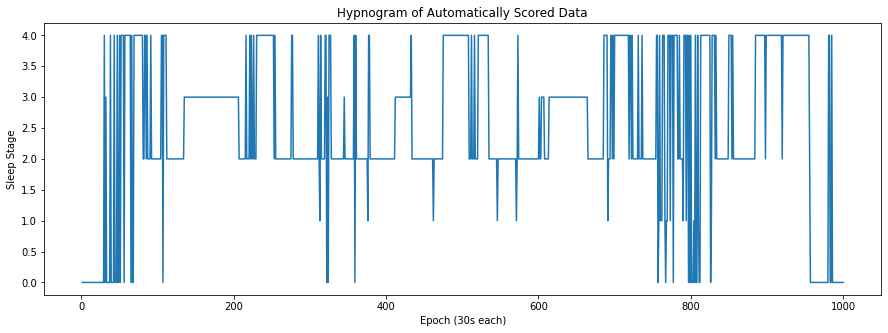

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(range(1, 1001), output_labels[:1000])
plt.title('Hypnogram of Automatically Scored Data')
plt.ylabel('Sleep Stage')
plt.xlabel('Epoch (30s each)')
plt.show()

# Unsupervised Learning Exploration
Another natural extension which we explored was developing an unsupervised learning clustering methodology which would be effective at grouping epochs into their specific sleep stages. We hoped that being able to acheive high classification accuracy using supervised techniques suggested that the various data classes were separable and thus even basic clustering techniques would be able to produce relatively accurate results.

We initially decided upon trying to perform k-means clustering on the vectorized epochs. We thought that this was a natural choice because the number of clusters that we expect our data to have is known at 5. However, upon initial investigation and further external research, we saw that many clustering techniques including k-means falls victim to what is known as *The Curse of Dimensionality*. This is the phenomenon that data in higher dimensions (in our case 3000) tend to be closer together in vector space and have lower variance making it harder for our algorithm to converge to the correct answer. We attempted to utilize PCA to reduce dimensionality in a technique known as spectral clustering but were not very successful.

In [ ]:
#########################
# UNSUPERVISED LEARNING #
#########################
num_clusters = 5
kmeans = tf.compat.v1.estimator.experimental.KMeans(num_clusters=num_clusters)

def input_fn():
  return tf.compat.v1.train.limit_epochs(
      tf.convert_to_tensor(train_X, dtype=tf.float32), num_epochs=1)

prev_centers = None
for _ in range(20):
  kmeans.train(input_fn)
  cluster_centers = kmeans.cluster_centers()
  if prev_centers is not None:
    print('delta:', cluster_centers - prev_centers)
  prev_centers = cluster_centers
  print('score:', kmeans.score(input_fn))
print('cluster centers:', cluster_centers)

cluster_indices = list(kmeans.predict_cluster_index(input_fn))
label_dict = {}
for i, point in enumerate(train_X):
  ci = cluster_indices[i]
  center = cluster_centers[ci]
  label_dict[point] = ci



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpwt59_xpi', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.